In [87]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

data = pd.read_csv('StudentsPerformance.csv')
#print(data.head())

numeric_data = data.replace(['male', 'female'], [0,1])
numeric_data = numeric_data.replace(['group A', 'group B', 'group C', 'group D', 'group E'], [0,1,2,3,4])
numeric_data = numeric_data.replace(['some high school', 'high school', 'some college', "associate's degree"
                                     , "bachelor's degree", "master's degree"], [0,1,2,3,4,5])
numeric_data = numeric_data.replace(['free/reduced', 'standard'], [0,1])
numeric_data = numeric_data.replace(['none', 'completed'], [0,1])
numeric_data = numeric_data.values

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


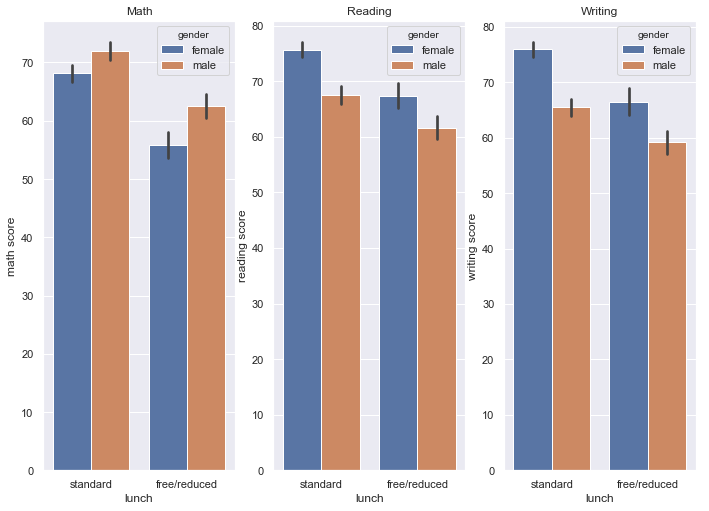

In [99]:
plt.subplot(1, 3, 1)
sns.barplot(x='lunch',y='math score',data=data,hue='gender')
plt.title('Math')
plt.subplot(1, 3, 2)
sns.barplot(x='lunch',y='reading score',data=data,hue='gender')
plt.title('Reading')
plt.subplot(1, 3, 3)
sns.barplot(x='lunch',y='writing score',data=data,hue='gender')
plt.title('Writing')
plt.show()

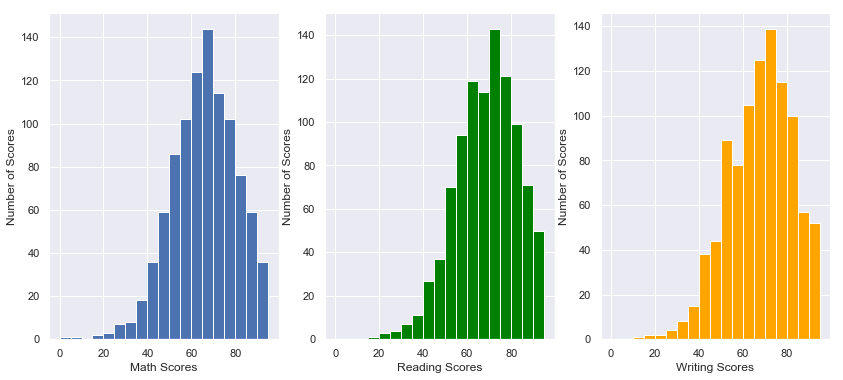

In [100]:
bins = np.arange(start=0, stop=100, step=5)

plt.subplot(1, 3, 1)
data['math score'].hist(bins=bins, figsize=[14,6])
plt.xlabel("Math Scores")
plt.ylabel("Number of Scores")
plt.subplot(1, 3, 2)
data['reading score'].hist(bins=bins, figsize=[14,6], color='green')
plt.xlabel("Reading Scores")
plt.ylabel("Number of Scores")
plt.subplot(1, 3, 3)
data['writing score'].hist(bins=bins, figsize=[14,6], color='orange')
plt.xlabel("Writing Scores")
plt.ylabel("Number of Scores")
plt.show()

P    677
F    323
Name: math_pass, dtype: int64


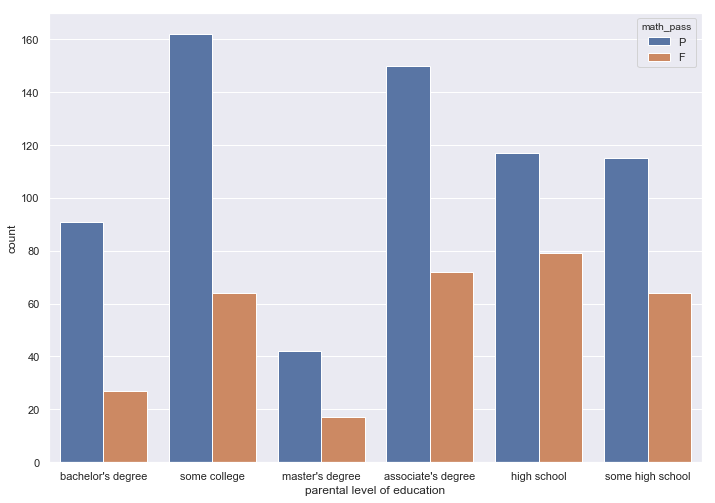

In [86]:
data['math_pass'] = np.where(data['math score']<60, 'F', 'P')
print(data.math_pass.value_counts())

p = sns.countplot(x='parental level of education', data = data, hue='math_pass')

P    746
F    254
Name: reading_pass, dtype: int64


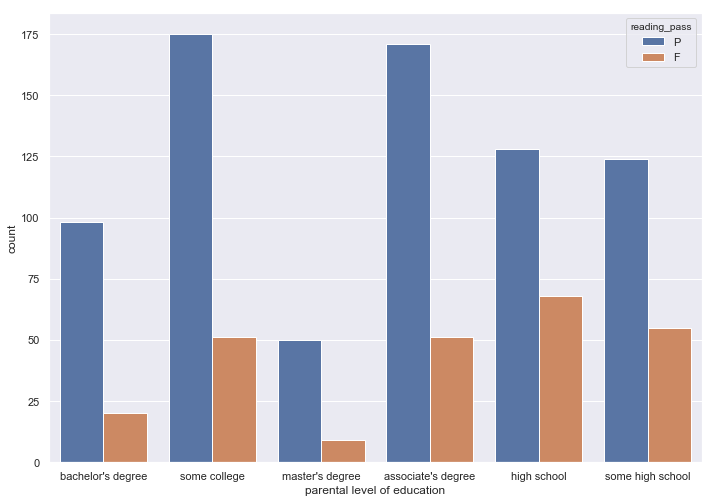

In [84]:
data['reading_pass'] = np.where(data['reading score']<60, 'F', 'P')
print(data.reading_pass.value_counts())

p = sns.countplot(x='parental level of education', data = data, hue='reading_pass')

P    719
F    281
Name: writing_pass, dtype: int64


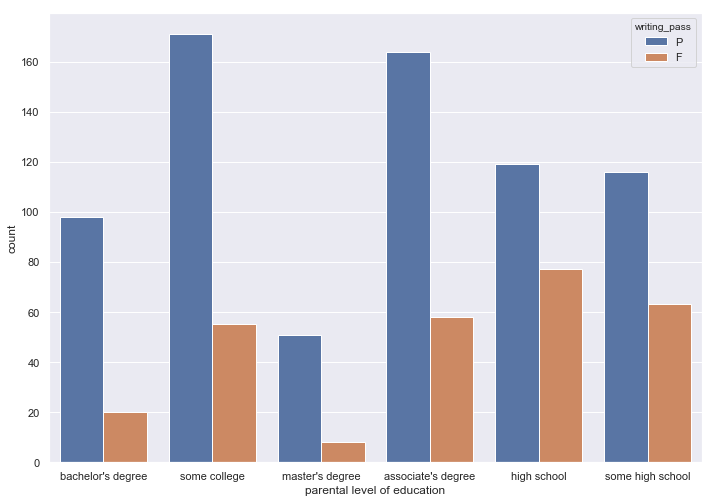

In [85]:
data['writing_pass'] = np.where(data['writing score']<60, 'F', 'P')
print(data.writing_pass.value_counts())

p = sns.countplot(x='parental level of education', data =data, hue='writing_pass')

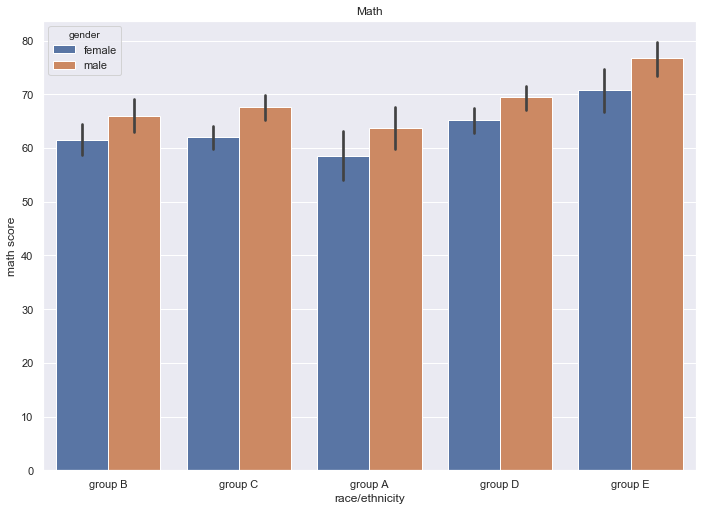

In [106]:
sns.barplot(x='race/ethnicity',y='math score',data=data,hue='gender')
plt.title('Math')

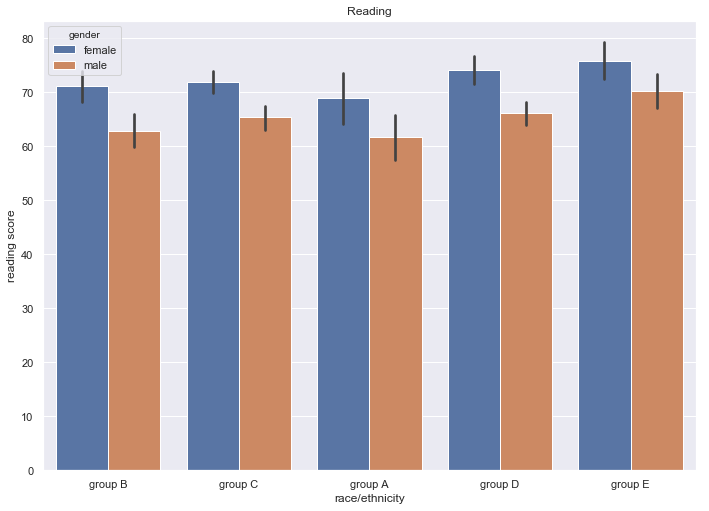

In [104]:
sns.barplot(x='race/ethnicity',y='reading score',data=data,hue='gender')
plt.title('Reading')

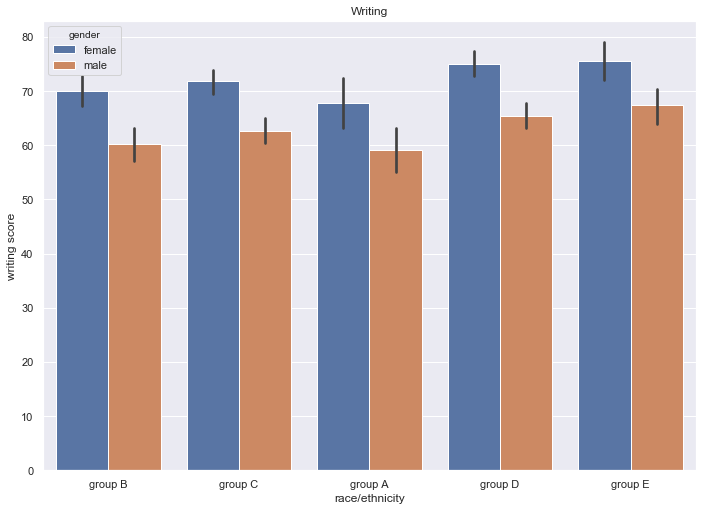

In [105]:
sns.barplot(x='race/ethnicity',y='writing score',data=data,hue='gender')
plt.title('Writing')

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split